In [91]:
import sys, os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from tbparse import SummaryReader
from torch_ac.utils import DictList

In [19]:
def sorted_listdir(path):
    files = sorted((f for f in os.listdir(path) if not f.startswith(".")), key=str.lower)
    return files

In [244]:
args = {}
args = DictList(args)

date = '2023-01-19'
approach = 'blip'
experiment = 'minigrid-tb-blip-5e5-doorkey-wallgap-lavagap-redbluedoor'
seed = [1,2,3]
F_prior = 5e-18

df_list = []
for i in seed:

    if approach == 'fine-tuning' or approach == 'ft-fix':
        log_name = '{}_{}_{}_{}'.format(date, experiment, approach,i)
    elif approach == 'ewc' in approach:
        log_name = '{}_{}_{}_{}_lamb_{}'.format(date, experiment, approach, i, ewc_lambda)
    elif approach == 'blip':
        log_name = '{}_{}_{}_{}_F_prior_{}'.format(date, experiment, approach, i, F_prior)

    train_dir = os.path.join("./result_data/", log_name, "train")
    event_file = os.path.join(train_dir, sorted_listdir(train_dir)[0])
    reader = SummaryReader(event_file, pivot=True)
    df = reader.scalars
    df_mean_std = df[['step', 'mean_reward', 'std']]
    df_list.append(df_mean_std)

df_all = pd.concat(df_list)
df_all_median = pd.concat(df_list).groupby(['step'])['mean_reward'].median().reset_index()
df_merged = df_all_median.merge(df_all[['mean_reward','std']].drop_duplicates('mean_reward'), how='left', on='mean_reward')

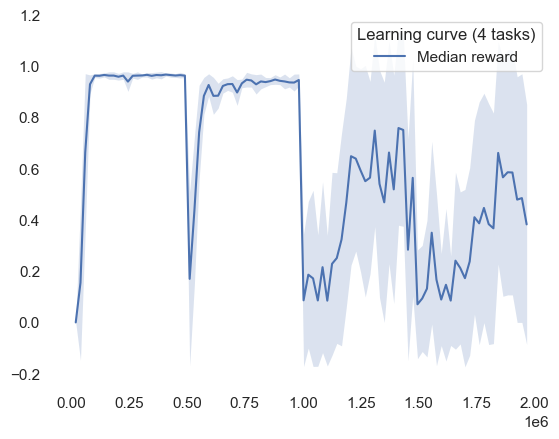

In [283]:
sns.set()
sns.set_style("white")  

x = df_merged['step']
median = df_merged['mean_reward']
std = df_merged['std']

plt.plot(x, median, 'b-', label='Median reward')
plt.fill_between(x, median - std, median + std, color='b', alpha=0.2, lw=0)
plt.legend(title='Learning curve (4 tasks)')

plt.show()

In [ ]:
args = {}
args = DictList(args)

date = '2023-01-19'
approach = ['blip','ewc','ft']
experiment = 'minigrid-tb-blip-5e5-doorkey-wallgap-lavagap-redbluedoor'
seed = [1,2,3]
F_prior = 5e-18
task_sequences = [
    (0, 'MiniGrid-DoorKey-6x6-v0'), 
    (1, 'MiniGrid-WallGapS6-v0'), 
    (2, 'MiniGrid-LavaGapS6-v0'),
    (3, 'MiniGrid-RedBlueDoors-6x6-v0')       
    ]
    
df_list = []
for i in seed:

    if approach == 'fine-tuning' or approach == 'ft-fix':
        log_name = '{}_{}_{}_{}'.format(date, experiment, approach,i)
    elif approach == 'ewc' in approach:
        log_name = '{}_{}_{}_{}_lamb_{}'.format(date, experiment, approach, i, ewc_lambda)
    elif approach == 'blip':
        log_name = '{}_{}_{}_{}_F_prior_{}'.format(date, experiment, approach, i, F_prior)

    train_dir = os.path.join("./result_data/", log_name, "train")
    event_file = os.path.join(train_dir, sorted_listdir(train_dir)[0])
    reader = SummaryReader(event_file, pivot=True)
    df = reader.scalars
    df_mean_std = df[['step', 'mean_reward', 'std']]
    df_list.append(df_mean_std)

df_all = pd.concat(df_list)
df_all_median = pd.concat(df_list).groupby(['step'])['mean_reward'].median().reset_index()
df_merged = df_all_median.merge(df_all[['mean_reward','std']].drop_duplicates('mean_reward'), how='left', on='mean_reward')

[Text(0, 0.5, 'value'), Text(0.5, 1.0, 'Mean reward')]

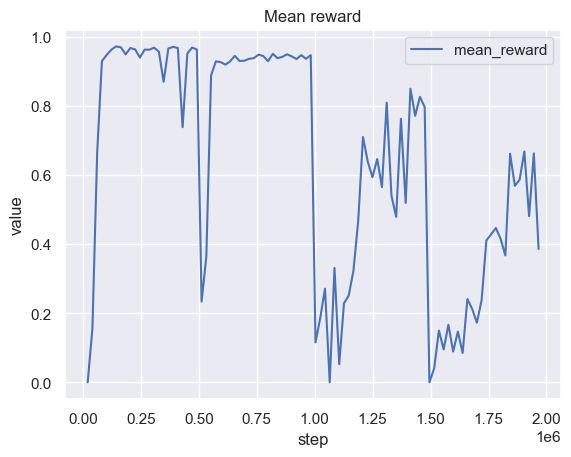

In [126]:
g = sns.lineplot(data=df_mean, x='step', y='value')

g.legend(['mean_reward'])
g.set(ylabel='value', title='Mean reward')

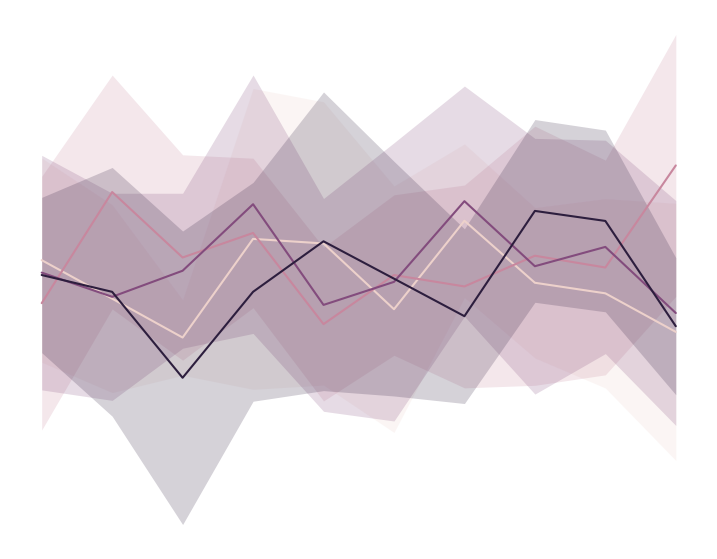

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")   
np.random.seed(2022)  # to produce the same data each time
df = pd.DataFrame({"trial" : np.random.randint(10, size=350),
                   "rvalues" : np.random.randn(350),
                   "subject" : np.random.randint(4, size=350)})

fig, ax = plt.subplots(figsize=(9, 7))
sns.lineplot(x="trial", y="rvalues", hue="subject", err_style="band", err_kws={'lw':0}, 
             errorbar='sd', estimator="median", data=df, ax=ax)
sns.move_legend(ax, loc='upper left', frameon=False)
sns.despine(left=True, bottom=True)

ax.get_legend().remove()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()